
# Introduction to Machine Learning
### Tom Galligan (thomas.galligan@bnc.ox.ac.uk)



Welcome to the Oxford University CodeSoc Introduction to Machine Learning course! By the end of this course, you'll have been exposed to the central ideas of machine learning (ML), and will have worked with some of its most popular and powerful algorithms. 


The first thing you need to do is download the relevant software packages. 
In this course, you'll need Python 3.5 with numpy, pandas, matplotlib and scikit learn (you might need to downgrade if you have a more recent version). You can download Python 3.5 from https://www.python.org/downloads/. 

I recommend installing Anaconda (https://docs.anaconda.com/anaconda/install/). This has all the main Python packages you'll need. You can also use pip, which is a bit more light-weight.

Then in a terminal, type the following:



In [ ]:
conda install ipython
conda install keras
conda install tensorflow
conda install sklearn
conda install matplotlib

Type these in one at a time.
If you have any of these packages already, you can do

In [ ]:
conda update ipython

etc.



To help things run more smoothly, please have these packages installed before the first class so we can get straight into coding.

Prerequisites for the course:
* Basic familiarity with Python will help a lot, but complete beginners should still find it enjoyable!
* Some knowledge of basic maths and statistics (mean, variance, notion of a function) will help a lot. 
* The deeper theory won't be covered in the classes, but if you want to look into it you'll find it easier if you're comfortable with things like partial derivatives, n-dimensional Gaussians, linear algebra, and metrics.



# Chapter 1: k-Nearest Neighbors

The first thing we'll do is open up an iPython shell. To do this, open up terminal/command prompt and type

In [ ]:
ipython --pylab

This option --pylab will start iPython with numpy and matplotlib already imported. 

Next we need to install the other packages we need. 

In [14]:
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

NOTE: sklearn changed their modules in a recent version, so a lot of the examples on the web are out of date. 

Now we want to load the data for our example. To do this, type

In [3]:
X, y  = datasets.load_iris(return_X_y=True)

X is a table containing the features in the following columns: sepal length, sepal width, petal length, petal width. y contains the species of each flower (setosa (0), versicolor (1), virginica (2))



First of all let's plot the data to see what we're working with (this almost always a good place to start).

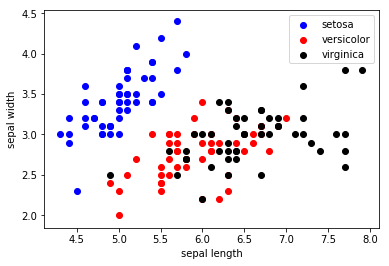

In [4]:
plt.scatter(X[:50,0],X[:50,1],color='blue',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='red',label='versicolor')
plt.scatter(X[100:150,0],X[100:150,1],color='black',label='virginica')
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

You can see that it should be easy to identify setosa purely from the sepal length and width, but to identify between versicolor and virginica, we'll need to include more data. Close the previous plot, and type the following:

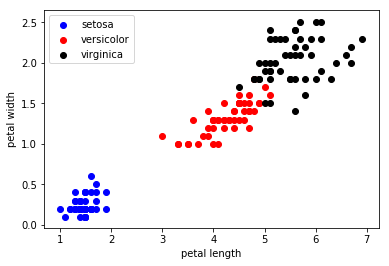

In [5]:
plt.scatter(X[:50,2],X[:50,3],color='blue',label='setosa')
plt.scatter(X[50:100,2],X[50:100,3],color='red',label='versicolor')
plt.scatter(X[100:150,2],X[100:150,3],color='black',label='virginica')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

It looks like we should be able to build a good classifying model from our data! First of all, we need to separate our data into a training batch and a test batch. This makes sure our test is 'clean', and is especially important in models where the training process is more involved. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train) # fit only the training data
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Now we'll initiate our model, considering the 3 nearest neighbors for now:

In [8]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

And train it on our data:

In [9]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

This might seem like a big step with a lot going on behind the scenes. In reality, all we've done is load the training data into the model. This is because kNN is a 'lazy-learner'. 

Next, we want to evaluate the accuracy of our model. Let's get it to take the features of the test data, and for each flower predict its species. 

In [10]:
pred = knn.predict(X_test_std)
print(accuracy_score(y_test,pred))

0.98


The algorithm predicts the species to 98% accuracy!

## Cross Validation
In the algorithm we created, we picked an arbitrary value of k. Depending on our value of k, we might get algorithms with different accuracy. Let's explore this further. 

We need a way to determine how the algorithm's accuracy compares as we tune the hyperparameter k. First of all, let's plot the accuracy for a range of values of k.

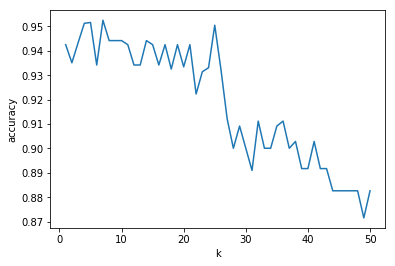

In [15]:
k_scores = []
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(np.arange(1,51), k_scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

You should find that the most accurate model is given by $k=7$. 

<img src='img/cross_val.png'>

## Challenge: Boston House Prices

First, load the data, and switch from a classifier to a regressor.

In [29]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
X, y = load_boston(return_X_y=True)

Train a KNN model to predict the housing price as accurately as possible! Since we're now performing a regression rather than a classification, you'll need to think about how we can judge the accuracy of our model. 

# ________________________________________________________________________

# Chapter 2: Random Forests


We want to build a random forest regression algorithm to predict Boston house prices more accurately. To do this, let's first import the modules we need.

In [30]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

Then the rest of the process should look familiar:

In [31]:
X, y = load_boston(return_X_y=True)

Random forests don't need to have the data scaled first, so no need for a StandardScaler() step!

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfr = RandomForestRegressor(n_estimators = 50, random_state = 42)
rfr.fit(X_train, y_train) # this step builds the random forest
y_pred = rfr.predict(X_test)

Let's see how good our random forest is. Remember the KNN gave a MSE of ~ 37.7.

In [33]:
mean_squared_error(y_pred, y_test)

10.062428502994013

This time our MSE is much lower than for the K Nearest Neighbors algorithm! 
And we've not even done any cross validation yet.
##### The random forest is in general a much better choice for high-dimensional feature spaces.

<img src='img/knn_vs_rf.png'>

## Cross validation of Random Forests

If you look at the sklearn documentation on random forests, you'll see that we have a huge number of options when we're building a regression model.

<img src='img/rfr_documentation.png'>

We'll just do the same thing, but now we're going to be searching through a hyperparemeter space of much higher dimension. We need to be careful with the so-called 'curse of dimensionality' here - work out how many random forests you'll be comparing in your search, and remember that random forests take up a huge amount of memory!

We'll implement this cross validation using GridSearchCV. First we create a dictionary to store the hyperparameters that we want to search over. 

In [39]:
from sklearn.model_selection import GridSearchCV

parameters =   {'n_estimators': list(np.arange(1,101, 5)),
                'max_features': ['sqrt', 'auto', 'log2'],
                'max_depth': [10, 30, 50, None],
                'bootstrap': [True, False]}

Now we can specify our machine learning model as normal, then run the gridsearch. This is going to create $5\times3\times2\times2 = 60$ random forests. 

In [40]:
gridsearch = GridSearchCV(RandomForestRegressor(random_state=42), parameters, scoring='neg_mean_squared_error', cv=5)
gridsearch.fit(X_train, y_train)

best = gridsearch.best_params_

rfr = RandomForestRegressor(n_estimators = best[n_estimators], max_features = best[max_features], max_depth = best[max_depth], bootstrap = best[bootstrap], random_state = 42)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
mean_squared_error(y_pred, y_test)

NameError: name 'n_estimators' is not defined

Once the gridsearch is finished, we can identify the best combination of parameters.

## Challenge: Handwriting recognition

Train a random forest to recognise the digits 0-9. Download the data using

In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original') 
X = mnist.data 
y = mnist.target

$X$ is 70000 flattened 28 x 28 arrays of pixels from photographs of handwritten digits. $y$ contains their intended numerical values. For the arrays in $X$, a value of 0 corresponds to the darkest possible pixel (black), and a value of 1 corresponds to the lightest possible pixel (white). 

Good luck! You should be able to get >95% accuracy. 

# Chapter 3: Introduction to Neural Networks

We're now ready to 